<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/EDA/steven_bernal_prueba_tecnica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diccionario de datos**
---

- `ID_Registro`: identificador del cliente.
- `FECHA_NACIMIENTO`: fecha de nacimiento del usuario
- `GENERO`: genero
- `CIUDAD`: ciudad de residencia
- `DEPARTAMENTO`: departamento de residencia
- `PAIS_RESIDENCIA`: pais de residencia
- `INGRESOS_MENSUALES`: ingresos mensuales financieros
- `EGRESOS_MENSUALES` egresos mensuales
- `ACTIVOS`: activos
- `PASIVOS`: pasivos
- `PATRIMONIO`: patrimonio
- `CAPTACION_VALOR_CREDITO`: Valor de las operaciones del ingreso en productos de captación 
- `CAPTACION_TRANSACCIONES_CREDITO`: Frecuencias de las operaciones de ingreso en productors de captación.
- `CAPTACION_VALOR_DEBITO`: Valor de las operaciones de egreso en productos de captación.
- `CAPTACION_TRANSACCIONES_DEBITO`: Frecuencia de las operaciones de egreso en productos de captación.
- `COLOCACION_VALOR_CREDITO`: Valor de las operaciones de ingreso en productos de colocación.
- `COLOCACION_TRANSACCIONES_CREDITO`: Frecuencias de las operaciones de ingreso en productos de Colocación.
- `COLOCACION_VALOR_DEBITO`: Valor de las operaciones de egreso en productos de colocación.
- `COLOCACION_TRANSACCIONES_DEBITO`: Frecuencia de las operaciones de egreso en productos de colocación,
- ` Nivel de riesgo`: Nivel de riesgo del cliente.
  - BAJO
  - MEDIO
  - ALTO



# **Contexto**
--- 

# **Conceptos**
--- 

In [5]:
def porcent_feature_nan(data):
  print(f'Columnas con valores faltantes')
  avaliable = data.isnull()
  avaliable = avaliable.apply(pd.Series.value_counts).fillna(0).T
  avaliable = avaliable[avaliable[True]>0][True]
  for i , j in enumerate(avaliable.index):
    porce_second_pr = np.around((avaliable[i] / data.shape[0]) * 100, 3)
    print(colored(f"""El porcentaje de los datos faltantes de la columna {j} con respecto 
    al número total de registros es de aproximadamente de un {porce_second_pr}%.\n""", attrs=['bold']))


In [6]:
def type_data_feature(data):
  data_numeric = (data.dtypes == "int64") | (data.dtypes == "float64")
  data_object  = (data.dtypes == "object")
  data_numeric = [c for c in data_numeric.index if data_numeric[c]]
  data_object = [c for c in data_object.index if data_object[c]]
  print(colored(f"""Contamos con {len(data_numeric)} características cuantitativas y 
  {len(data_object)} categoricas \n""", attrs=['bold']))

  return data_numeric, data_object

In [7]:
def plot_bars(data, title: str= 'feature', x_size:int=15, y_size:int=5, 
              font_size:int=5, nrows=1, ncols=2):
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (x_size, y_size))
  fig.suptitle(f'Count plot {title}', fontsize = font_size)
  sns.countplot(x = data, ax = ax[0])
  ax[0].set_title(f'Diagrama de barras {title}', size = 15)

  aver = data.value_counts()
  plt.pie(data.value_counts(), labels = aver.index, autopct="%0.1f %%")
  plt.title(f'Diagrama de torta {title}')

  fig.tight_layout()
  plt.subplots_adjust(top = 0.80)
  fig.suptitle(f'Conteo Variables Cualitativas {title}', fontsize = 17, fontweight = "bold");
  

In [8]:
def inverso_estand(data_trans, data_org, feature, limit):
  a = data_num[(data_trans[feature] >= limit[0]) & (data_trans[feature] <= limit[1])][feature]
  imax = a.max()
  imin = a.min()
  imax = a.get(a == imax).index
  imin = a.get(a == imin).index
  imax = data[feature].iloc[imax]
  imin = data[feature].iloc[imin]
  return imax.values[0], imin.values[0]

# **Librerias**
---

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from termcolor import colored
from datetime import datetime, timedelta


from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from collections import Counter


In [10]:
data = pd.read_csv('./data/Prueba_Segmentacion.csv')
data.tail(5)

,ID_Registro,FECHA_NACIMIENTO,GENERO,CIUDAD,DEPARTAMENTO,PAIS_RESIDENCIA,INGRESOS_MENSUALES,EGRESOS_MENSUALES,ACTIVOS,PASIVOS,PATRIMONIO,CAPTACION_VALOR_CREDITO,CAPTACION_TRANSACCIONES_CREDITO,CAPTACION_VALOR_DEBITO,CAPTACION_TRANSACCIONES_DEBITO,COLOCACION_VALOR_CREDITO,COLOCACION_TRANSACCIONES_CREDITO,COLOCACION_VALOR_DEBITO,COLOCACION_TRANSACCIONES_DEBITO,Nivel de riesgo
282384,ID_282692,1900-01-01,F,YOPAL,CASANARE,PENDIENTE,0.0,0.0,0,0.0,0.0,10000.0,1,0.0,0,0.0,0,0.0,0,ALTO
282385,ID_282693,1900-01-01,M,PALMIRA,VALLE DEL CAUCA,PENDIENTE,0.0,0.0,0,0.0,0.0,15000.0,1,0.0,0,0.0,0,0.0,0,ALTO
282386,ID_282694,1900-01-01,M,PALMIRA,VALLE DEL CAUCA,PENDIENTE,0.0,0.0,0,0.0,0.0,1015000.0,2,0.0,0,0.0,0,0.0,0,ALTO
282387,ID_282695,1900-01-01,M,PALMIRA,VALLE DEL CAUCA,PENDIENTE,0.0,0.0,0,0.0,0.0,1000000.0,1,0.0,0,0.0,0,0.0,0,ALTO
282388,ID_282696,1900-01-01,M,PATIA,CAUCA,PENDIENTE,0.0,0.0,0,0.0,0.0,15000.0,1,0.0,0,0.0,0,0.0,0,ALTO


# **Información preliminar**


---



In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282389 entries, 0 to 282388
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ID_Registro                       282389 non-null  object 
 1   FECHA_NACIMIENTO                  282385 non-null  object 
 2   GENERO                            282389 non-null  object 
 3   CIUDAD                            277947 non-null  object 
 4   DEPARTAMENTO                      278916 non-null  object 
 5   PAIS_RESIDENCIA                   182417 non-null  object 
 6   INGRESOS_MENSUALES                282389 non-null  float64
 7   EGRESOS_MENSUALES                 282389 non-null  float64
 8   ACTIVOS                           282389 non-null  int64  
 9   PASIVOS                           282389 non-null  float64
 10  PATRIMONIO                        282389 non-null  float64
 11  CAPTACION_VALOR_CREDITO           282389 non-null  f

---
- Tenemos 19 características
- Lo ideal es que hallan 282389  registros, algunas no cumplen, lo que significa que hay valores nulos
---

In [12]:
data['ID_Registro'].value_counts()

ID_0         1
ID_188670    1
ID_188676    1
ID_188675    1
ID_188674    1
            ..
ID_94227     1
ID_94228     1
ID_94229     1
ID_94230     1
ID_282696    1
Name: ID_Registro, Length: 282389, dtype: int64

In [13]:
data_numeric, data_object = data_numeric, data_object = type_data_feature(data)

Contamos con 13 características cuantitativas y 
  7 categoricas 



### **Transformación del tipo de dato**
---

Las variables CAPTACION_TRANSACCIONES_CREDITO, CAPTACION_TRANSACCIONES_DEBITO, COLOCACION_TRANSACCIONES_CREDITO y COLOCACION_TRANSACCIONES_DEBITO son variables cuantitativas pero de naturaleza discreta.

In [14]:
data['CAPTACION_TRANSACCIONES_CREDITO'].astype('int64')
data['CAPTACION_TRANSACCIONES_DEBITO'].astype('int64')
data['COLOCACION_TRANSACCIONES_CREDITO'].astype('int64')
data['COLOCACION_TRANSACCIONES_DEBITO'].astype('int64')

0         0
1         0
2         0
3         0
4         0
         ..
282384    0
282385    0
282386    0
282387    0
282388    0
Name: COLOCACION_TRANSACCIONES_DEBITO, Length: 282389, dtype: int64

### **Valores nulos**
---

In [15]:
porcent_feature_nan(data)

Columnas con valores faltantes
El porcentaje de los datos faltantes de la columna FECHA_NACIMIENTO con respecto 
    al número total de registros es de aproximadamente de un 0.001%.

El porcentaje de los datos faltantes de la columna CIUDAD con respecto 
    al número total de registros es de aproximadamente de un 1.573%.

El porcentaje de los datos faltantes de la columna DEPARTAMENTO con respecto 
    al número total de registros es de aproximadamente de un 1.23%.

El porcentaje de los datos faltantes de la columna PAIS_RESIDENCIA con respecto 
    al número total de registros es de aproximadamente de un 35.402%.



---
- Se recomienda eliminar la caracteristica ID_Registro pues no aporta información.
- Las variables de FECHA_NACIMIENTO, CIUDAD, DEPARTAMENTO  puede imputarse  por la moda.
- Se pude eliminar los registros nulos de FECHA_NACIMIENTO puesto el procentaje es menos del 1%.
- Con el fin de evitar cambiar la distribución de los datos de la columna PAIS_RESIDENCIA es recomendable imputar.  Se puede investigar si la falta de la información es debido a la aleatoriedad o a un fenómeno aleatorio, en caso de ser una caracteristica de relevancia. Puede utilizar un algoritmo de imputación HOT-DECK como el KNN.











---

# **Análisis Univariado**
---

In [16]:
data.describe(include="all")

,ID_Registro,FECHA_NACIMIENTO,GENERO,CIUDAD,DEPARTAMENTO,PAIS_RESIDENCIA,INGRESOS_MENSUALES,EGRESOS_MENSUALES,ACTIVOS,PASIVOS,PATRIMONIO,CAPTACION_VALOR_CREDITO,CAPTACION_TRANSACCIONES_CREDITO,CAPTACION_VALOR_DEBITO,CAPTACION_TRANSACCIONES_DEBITO,COLOCACION_VALOR_CREDITO,COLOCACION_TRANSACCIONES_CREDITO,COLOCACION_VALOR_DEBITO,COLOCACION_TRANSACCIONES_DEBITO,Nivel de riesgo
count,282389,282385,282389,277947,278916,182417,2.823890e+05,2.823890e+05,2.823890e+05,2.823890e+05,2.823890e+05,2.823890e+05,282389.000000,2.823890e+05,282389.000000,2.823890e+05,282389.00000,2.823890e+05,282389.000000,282389
unique,282389,25381,2,642,30,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,ID_0,1900-01-01,F,MUNICIPIO DE CALI,VALLE DEL CAUCA,COLOMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BAJO
freq,1,4763,168411,45446,91177,168860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166489
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.668654e+07,1.208259e+07,5.145358e+07,1.024777e+07,4.120799e+07,6.418549e+05,0.952944,2.661048e+05,0.392253,3.161796e+05,1.01312,7.568175e+04,0.037275,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.953295e+09,2.328406e+09,2.346876e+09,7.386955e+08,2.424376e+09,7.993285e+06,0.838970,4.072238e+06,0.773728,3.857571e+05,0.84305,1.008247e+06,0.191277,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.999400e+11,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.280000e+06,7.000000e+05,3.900000e+06,1.000000e+05,1.600000e+06,1.100000e+04,1.000000,0.000000e+00,0.000000,1.219040e+05,1.00000,0.000000e+00,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.200000e+06,1.479000e+06,1.000000e+07,1.855000e+06,6.604000e+06,4.142300e+04,1.000000,0.000000e+00,0.000000,2.295770e+05,1.00000,0.000000e+00,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+06,2.976666e+06,4.000000e+07,7.000000e+06,3.000000e+07,7.531900e+04,1.000000,1.000000e+04,1.000000,3.836735e+05,1.00000,0.000000e+00,0.000000,NaN


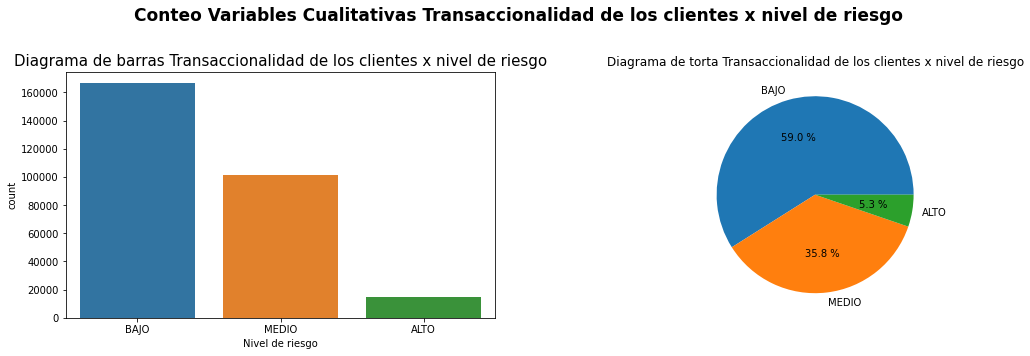

In [17]:
plot_bars(data['Nivel de riesgo'], 'Transaccionalidad de los clientes x nivel de riesgo')

---
- El conjunto no está balanceado
- La categoría con más registros es Bajo con un 59% de los datos
- La categoría con menos registros es Alto con un 5% de los datos
- Existe un desbalance amplio del valor ALTO con respeto a los otros valores de 1 a 10.
---

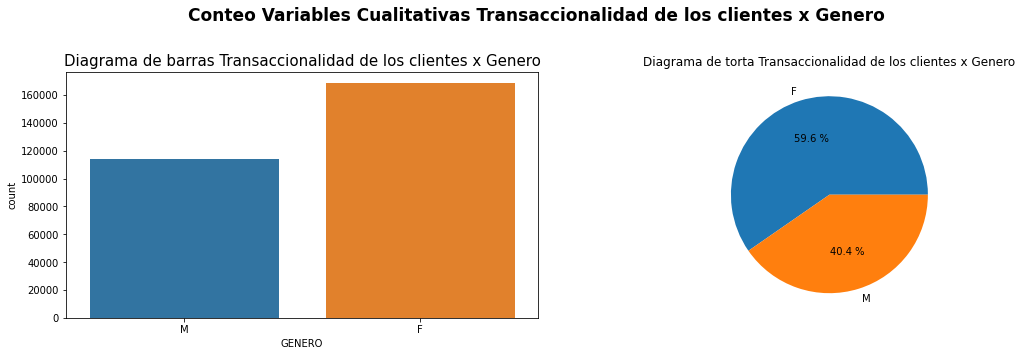

In [18]:
plot_bars(data['GENERO'], 'Transaccionalidad de los clientes x Genero')

---
- Hay un número mayor de registros correspondientes a mujeres (59.6%) que a hombres (40.4%) el desbalance no es tan pronunciado.
---

### **Valores Atipicos**
---

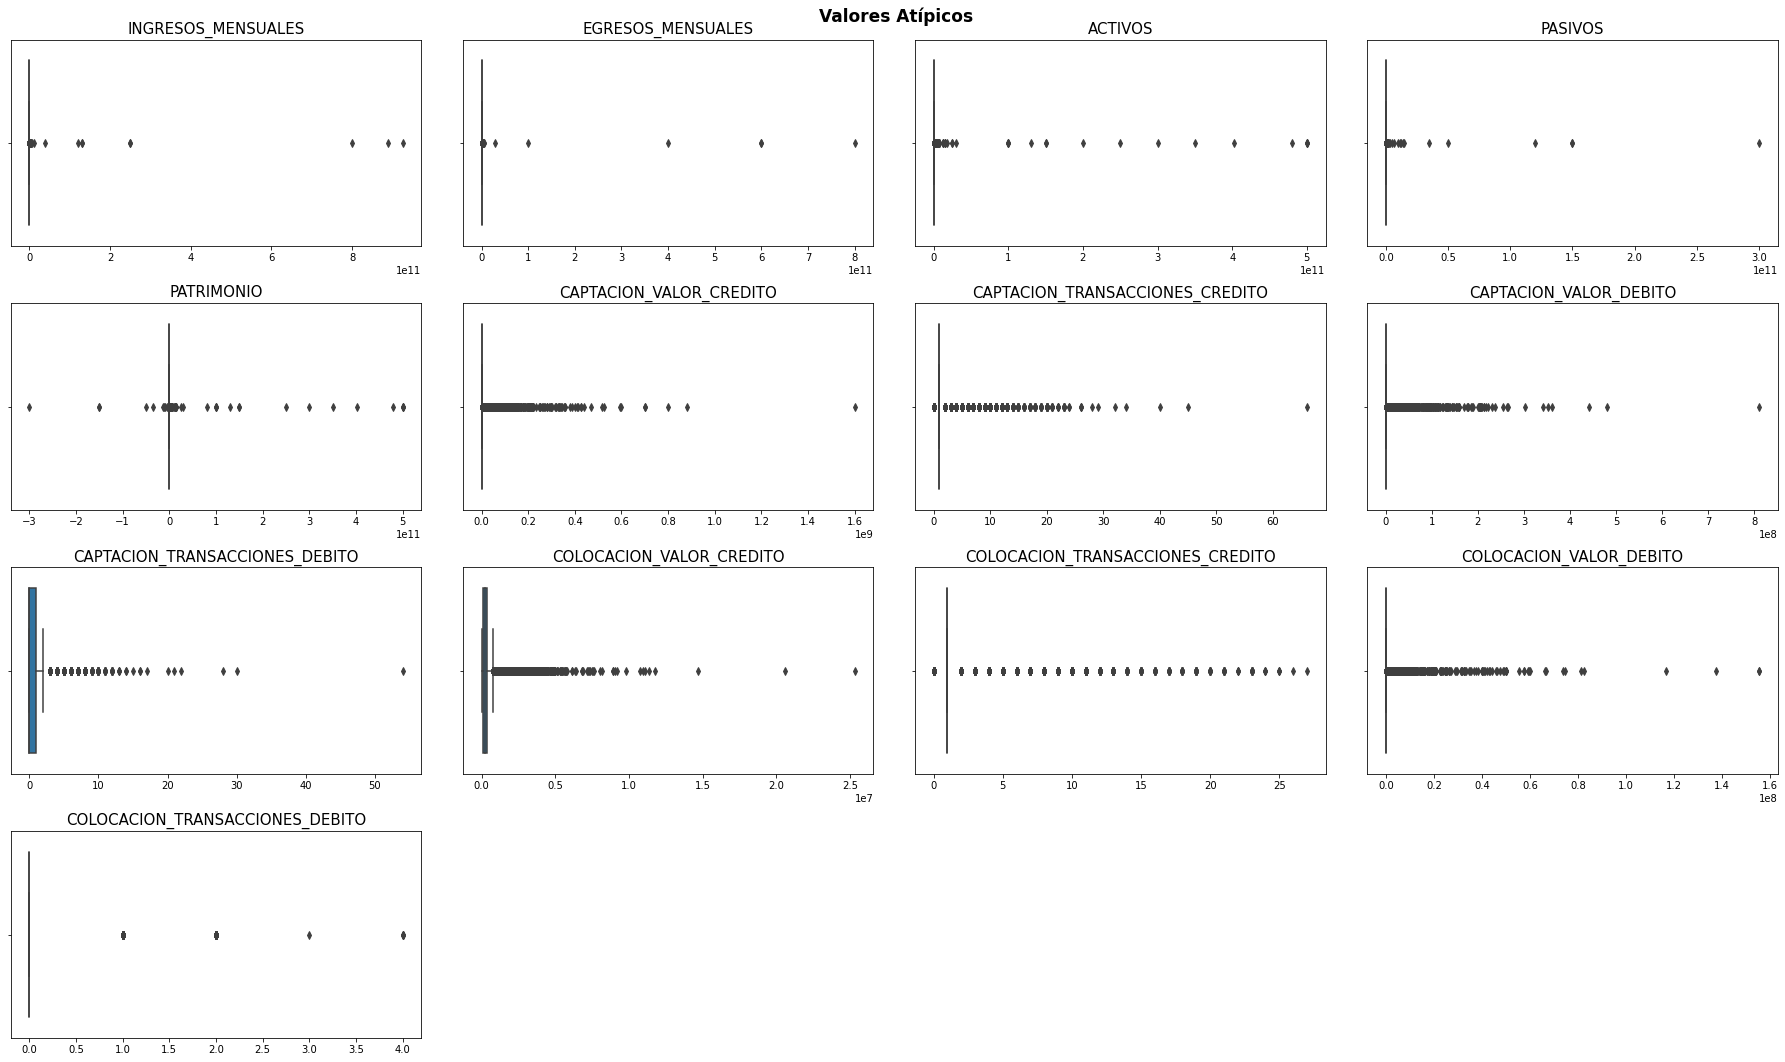

In [19]:
fig, ax = plt.subplots(nrows = 4, ncols=4, figsize = (25,15))
ax = ax.flat
for i, col in enumerate(data_numeric):
    sns.boxplot(
        x = data[col],
        ax = ax[i]
    )
    ax[i].set_title(col, size = 15)
    ax[i].tick_params(labelsize = 10)
    ax[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Valores Atípicos', fontsize = 17, fontweight = "bold");
fig.delaxes(ax[-3])
fig.delaxes(ax[-2])
fig.delaxes(ax[-1])

In [69]:
def data_boxplot(data, data_numeric):
  reporte_atipicos = pd.DataFrame(columns = data_numeric, index = ['Borde_Inferior','Q1','Q2','Q3','Ric','Borde_Superior','Atip_s','Atip_i','Atip_Total','Porcentaje_Atipicos'])

  for i, m in enumerate(data_numeric):
      temp = []
      q1 = data[m].quantile(0.25)
      q3 = data[m].quantile(0.75)
      q2 = data[m].quantile(0.5)
      ric = q3-q1
      borde_s = q3 + 1.5*ric
      borde_i = q1-1.5*ric
      atip_s = data[data[m]>borde_s].shape[0]
      atip_i = data[data[m]<borde_i].shape[0]
      t = atip_s + atip_i
      p = (t/(data.shape[0]))*100
    
      temp.append(borde_i)
      temp.append(q1)
      temp.append(q2)
      temp.append(q3)
      temp.append(ric)
      temp.append(borde_s)
      temp.append(atip_s)
      temp.append(atip_i)
      temp.append(t)
      temp.append(p)
      reporte_atipicos[m] = temp
      
      

  print(colored(f'Reporte cuantitativo de los datos atípicos', attrs=['bold']))    
  display(reporte_atipicos.T)  

---
- Todas las distribuciones presentan valores atipicos. La caracteristica con menos valores atipicos es CAPTACION_TRANSACCIONES_DEBITO Y la que presenta mas valores es COLOCACION_TRANSACCIONES_CREDITO
- Por el gran volumen de valores y por la distancia de estos, no se puede observar una distribución en especifico. Lo que si se puede evidenciar es que todas presentan sesgos, la mayoria una asimetria positiva.
---

In [21]:
informe_asimetria_kurtosis = pd.DataFrame(columns = data_numeric, index = ['Coeficiente_Asimetria','Coeficiente_Curtosis'])
for i in data_numeric:
    temp = []
    temp.append(data[i].skew())
    temp.append(data[i].kurt())
    informe_asimetria_kurtosis[i] = temp
informe_asimetria_kurtosis.T

,Coeficiente_Asimetria,Coeficiente_Curtosis
INGRESOS_MENSUALES,281.299322,82768.379077
EGRESOS_MENSUALES,283.049649,83667.851108
ACTIVOS,179.798509,34669.419269
PASIVOS,313.217756,110917.109263
PATRIMONIO,152.807673,31219.159201
CAPTACION_VALOR_CREDITO,62.502083,7883.166275
CAPTACION_TRANSACCIONES_CREDITO,9.361929,304.024041
CAPTACION_VALOR_DEBITO,67.761428,8311.512623
CAPTACION_TRANSACCIONES_DEBITO,4.495232,116.812962
COLOCACION_VALOR_CREDITO,5.564652,134.038829


---
- Coeficientes de asimetría y curtosis no se puede dar una conclusión precisa por la cantidad de valores atípicos y su distancia a la media de su respectiva distribución.

- Se debe normalizar o utilizar una tecnica como Box Cox , o una transformación logaritmicar para aprecia la información 
---

### Estnadarizar datos
---

In [22]:
data_num = data[data_numeric]

In [23]:
scaler = StandardScaler()
data_num = scaler.fit_transform(data_num)

In [24]:
data_num = pd.DataFrame(data_num, columns = data_numeric)
data_num.head(3)

,INGRESOS_MENSUALES,EGRESOS_MENSUALES,ACTIVOS,PASIVOS,PATRIMONIO,CAPTACION_VALOR_CREDITO,CAPTACION_TRANSACCIONES_CREDITO,CAPTACION_VALOR_DEBITO,CAPTACION_TRANSACCIONES_DEBITO,COLOCACION_VALOR_CREDITO,COLOCACION_TRANSACCIONES_CREDITO,COLOCACION_VALOR_DEBITO,COLOCACION_TRANSACCIONES_DEBITO
0,-0.005312,-0.005103,-0.017663,-0.013602,-0.012955,-0.078423,0.056087,-0.065346,-0.506966,-0.819635,-1.201735,-0.075063,-0.194874
1,-0.005413,-0.005103,-0.021072,-0.013805,-0.016193,-0.078423,0.056087,-0.065346,-0.506966,-0.819635,-1.201735,-0.075063,-0.194874
2,-0.005274,-0.004932,-0.017663,-0.007104,-0.014935,-0.077797,0.056087,-0.065346,-0.506966,-0.819635,-1.201735,-0.075063,-0.194874


In [25]:
def plot_density(data, features,  nrows:int = 1, ncols:int =3, x_size:int=6, y_size:int=5, font_size:int=15):
  fig, ax = plt.subplots(nrows, ncols, figsize = (x_size, y_size))
  ax = ax.flat
  for i, col in enumerate(features):
    temp = data[col]
    sns.kdeplot(temp, color='blue', shade=False, ax = ax[i], warn_singular=None)
    ax[i].axvline(temp.mean(), c='r', linestyle = '--', label = 'Promedio')
    ax[i].axvline(temp.median(), c='black', linestyle = '--', label = 'Mediana')
    
    ax[i].set_title(col, size = 15)
    ax[i].tick_params(labelsize = 12)
    ax[i].set_xlabel("", size=9)
    ax[i].legend()


  fig.tight_layout()
  plt.subplots_adjust(top = 0.85)
  fig.suptitle('Distribución Densidad Variables Cuantitativas', fontsize = 17, fontweight = "bold");
  

In [26]:
data_num2 = np.log(data_num)
data_num3 = np.log(data[data_numeric])

In [27]:
temp

[5.086585658942796, 26.192517003089808]

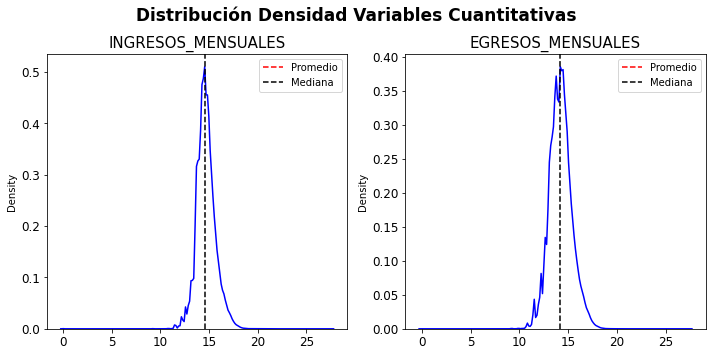

In [28]:
temp = data_numeric[:2]

plot_density(data_num3, temp, nrows=1, ncols=2, x_size=10, y_size=5)

In [25]:
inverso_estand(data_num2, data, 'INGRESOS_MENSUALES', [-10, -3]), inverso_estand(data_num2, data, 'EGRESOS_MENSUALES', [-10, -3])

((160800000.0, 16823000.0), (128000000.0, 12188299.0))

In [26]:
inverso_estand(data_num3, data, 'INGRESOS_MENSUALES', [10, 17]), inverso_estand(data_num3, data, 'EGRESOS_MENSUALES', [10, 17])

((24152542.0, 30000.0), (24152163.0, 24000.0))

---
- Los datos que se encuentran más cerca a la media forman una distribución simetrica en los ingresos mensuales, ademas de presentar una probabilidad de ocurrencia aproximadamente entre los 16823000.0 y 1000000.0 millones

- Los datos que se encuentran más cerca a la media forman una distribución simetrica con una pequeña desviación en los EGRESOS_MENSUALES, ademas de presentar una probabilidad de ocurrencia aproximadamente entre los 12188299.0 y 128000000.0 millones

- No hay evidencia paraa determinar que halla una relación
---

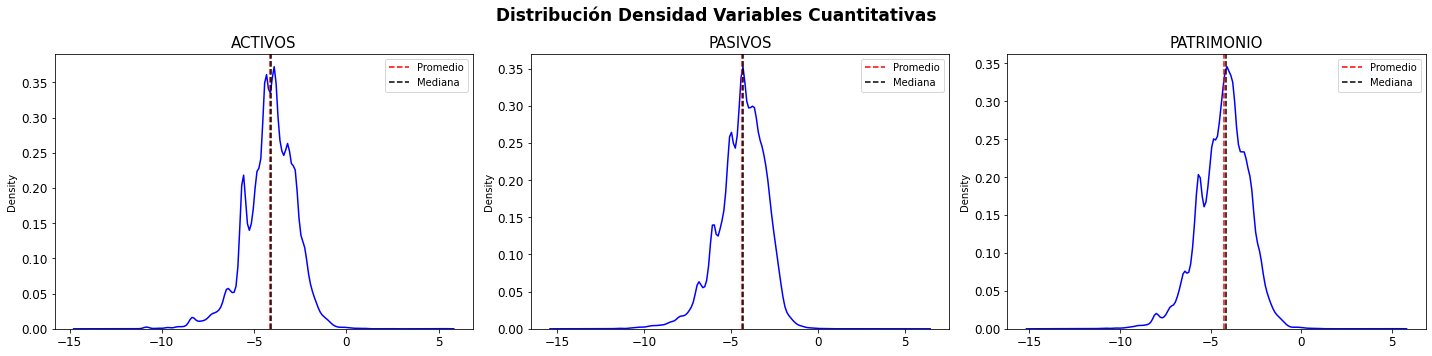

In [27]:
temp = data_numeric[2:5]
plot_density(data_num2, temp, nrows=1, ncols=3, x_size=20, y_size=5)

In [28]:
inverso_estand(data_num2, data, 'ACTIVOS', [-10, 0]), inverso_estand(data_num2, data, 'PASIVOS', [-10, 0]), inverso_estand(data_num2, data, 'PATRIMONIO', [-10, 0])

((2394887000, 51570000), (746096000.0, 10282000.0), (2461342297.0, 41320000.0))

---
- Los datos que se encuentran más cerca a la media forman una distribución simetrica con una pequeña desviación en los ACTIVOS, ademas de presentar una probabilidad de ocurrencia aproximadamenteentre los 51570000 y 2394887000 millones.

- Los datos que se encuentran más cerca a la media forman una distribución simetrica con una pequeña desviación en los PASIVOS, ademas de presentar una probabilidad de ocurrencia aproximadamente entre los 10282000.0 y 746096000.0 millones

- Los datos que se encuentran más cerca a la media forman una distribución simetrica con una pequeña desviación en los PATRIMONIO, ademas de presentar una probabilidad de ocurrencia aproximadamente entre los 10282000.0 y 746096000.0 millones

---

In [30]:
inverso_estand(data_num2, data, 'INGRESOS_MENSUALES'), inverso_estand(data_num2, data, 'EGRESOS_MENSUALES')

TypeError: ignored

In [ ]:
temp = data_numeric[5:9]
plot_density(data_num2, temp, nrows=1, ncols=4, x_size=17, y_size=5)

In [ ]:
temp

In [ ]:
inverso_estand(data_num2, data, 'CAPTACION_VALOR_CREDITO'), inverso_estand(data_num2, data, 'CAPTACION_VALOR_DEBITO')

---

---

---

---

# **Preprocesamiento**
---

In [29]:
data = data[data['FECHA_NACIMIENTO'].notnull()]

In [30]:
# Edad

def convertion_age(date):
    format_date = datetime.strptime(date, '%Y-%m-%d')
    data_now = current = datetime.now()
    date = data_now - format_date
    return int(date.days/365)

In [31]:
data['Age'] = [convertion_age(str(c)) for c in data['FECHA_NACIMIENTO']]

# Analisis Bi Variado

In [32]:
data.columns

Index(['ID_Registro', 'FECHA_NACIMIENTO', 'GENERO', 'CIUDAD', 'DEPARTAMENTO',
       'PAIS_RESIDENCIA', 'INGRESOS_MENSUALES', 'EGRESOS_MENSUALES', 'ACTIVOS',
       'PASIVOS', 'PATRIMONIO', 'CAPTACION_VALOR_CREDITO',
       'CAPTACION_TRANSACCIONES_CREDITO', 'CAPTACION_VALOR_DEBITO',
       'CAPTACION_TRANSACCIONES_DEBITO', 'COLOCACION_VALOR_CREDITO',
       'COLOCACION_TRANSACCIONES_CREDITO', 'COLOCACION_VALOR_DEBITO',
       'COLOCACION_TRANSACCIONES_DEBITO', 'Nivel de riesgo', 'Age'],
      dtype='object')

In [33]:
data_object

['ID_Registro',
 'FECHA_NACIMIENTO',
 'GENERO',
 'CIUDAD',
 'DEPARTAMENTO',
 'PAIS_RESIDENCIA',
 'Nivel de riesgo']

In [34]:
first_group = data.groupby([data_object[2],'Nivel de riesgo']).size().reset_index(name = 'Observaciones')
first_group

,GENERO,Nivel de riesgo,Observaciones
0,F,ALTO,5067
1,F,BAJO,105240
2,F,MEDIO,58100
3,M,ALTO,9769
4,M,BAJO,61245
5,M,MEDIO,42964


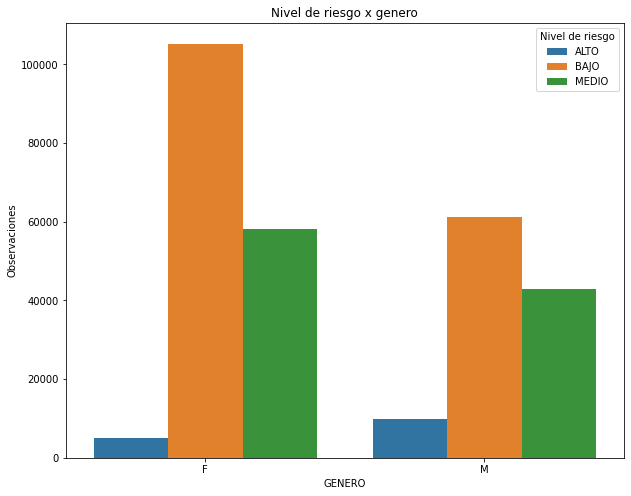

In [35]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,8))
sns.barplot(x = first_group.iloc[:,0], y = first_group.iloc[:,2], hue=first_group.iloc[:,1], 
            data=first_group)

plt.title("Nivel de riesgo x genero")
plt.show()

--- 
- No hay diferencia significativa en el genero con relación al nivel Alto de transacciones mirando en el grafico, sin embargo la distancia entre el numero de observación podria indicar lo contrario.

- Con relación al nivel de riesgo bajo, parece que las mujeres son mas propensas que los hombres. La diferencia es significativa

- El mismo fenomeno del riesgo alto sucede con el nivel bajo, sin embargo a una diferencia remarcada, parece que las mujer tiene un riego medio significativo con relación al hombre.

- La diferencia no es concliyente por si sola, más aun por el echo de que en la base de datos, hay más precencia de mujeres que de hombre.

---

In [36]:
data_num['Nivel de riesgo'] = data['Nivel de riesgo'] 
data_num['GENERO'] = data['GENERO'] 

In [37]:
data_num2['Nivel de riesgo'] = data['Nivel de riesgo'] 
data_num2['GENERO'] = data['GENERO'] 

In [38]:
data_num3['Nivel de riesgo'] = data['Nivel de riesgo'] 
data_num3['GENERO'] = data['GENERO'] 
data_num3['AGE'] = np.log(data['Age']) 

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


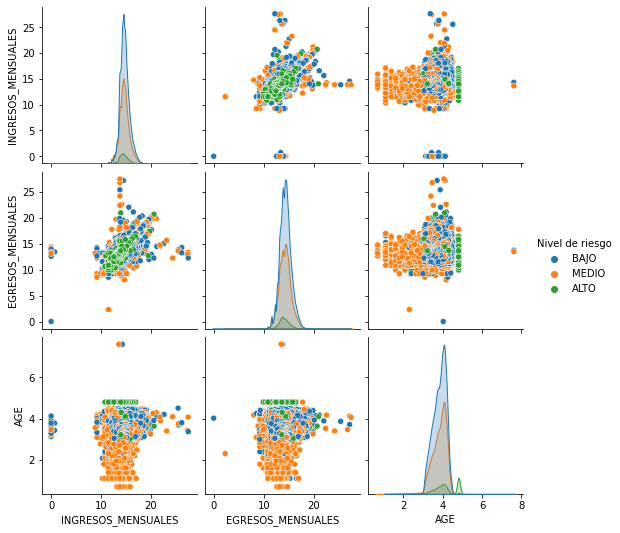

In [41]:
temp = data_num3[['INGRESOS_MENSUALES', 'EGRESOS_MENSUALES', 'Nivel de riesgo', 'AGE']]
sns.pairplot(temp, hue='Nivel de riesgo')

---
- Las personas con ingresos mensuale tiene un realción directa entre los ingresos frente a los egresos. La relación más fuerte está en el nivel de riesgo Alto. Entre más ingresos mas  egresos hay. Las personas con riesgo bajo y medio aunque presentán una relación hay desviaciones. Si una persona gana más puede gastar más.

- Parece que la edad no es tán influyente, pues la persona con más edad tiene un ingreso entre el rango de la mayoria de los ingresos.
---

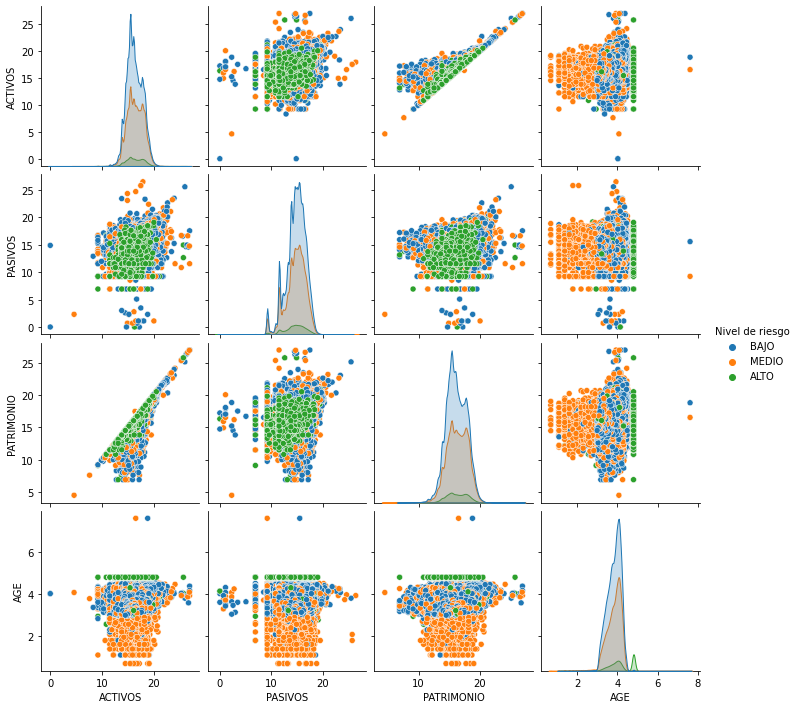

In [42]:
temp = data_num3[['ACTIVOS', 'PASIVOS', 'PATRIMONIO', 'Nivel de riesgo', 'AGE']]
sns.pairplot(temp, hue='Nivel de riesgo')

---
- Existe una correlación fuerte entre los activos y patrimonio de las personas con riesgo alto. A mayor activo mayor patrimonio
-- Tambien existe una correlación directa fuerte no tanto como el nivel Alto, en el nivel medio.
- Un porcentaje de los alto de los datos riego bajo se concentran con una porción alta de activos, pero no con patrimonio correspondiente al activo.
- Parece haber una relación entre pasivo con patrimonio y activo pero no es fueretes.
---

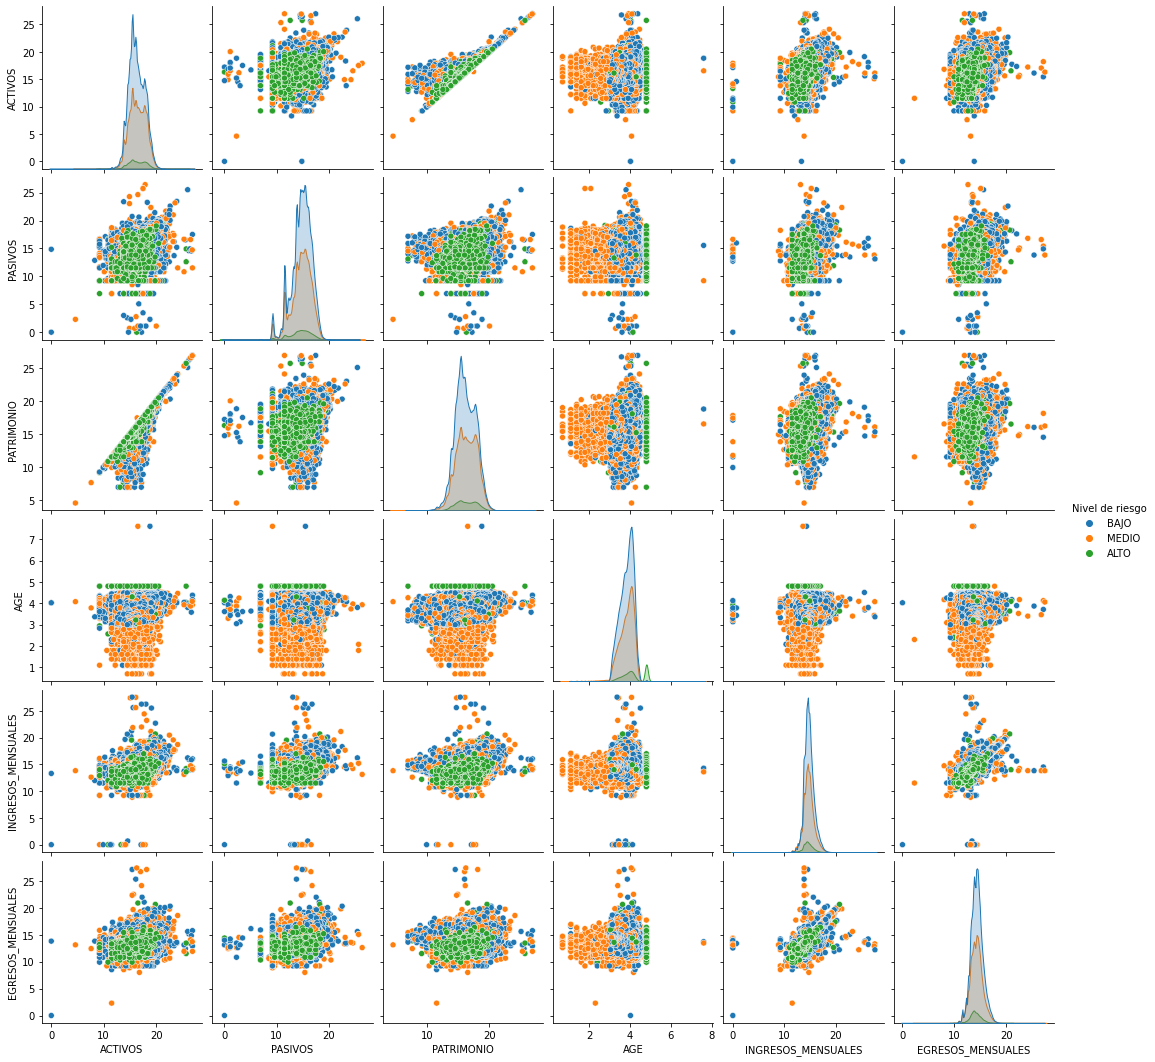

In [43]:
temp = data_num3[['ACTIVOS', 'PASIVOS', 'PATRIMONIO', 'Nivel de riesgo', 'AGE', 'INGRESOS_MENSUALES', 'EGRESOS_MENSUALES']]
sns.pairplot(temp, hue='Nivel de riesgo')

- Existe una relación entre ingresos y patrimonio. a mayor ingreso mayor patrimonio, pero no es concluyente.
- Hay una concentración alta entr los activos altos frente a los egresos, pero no es fuerte.


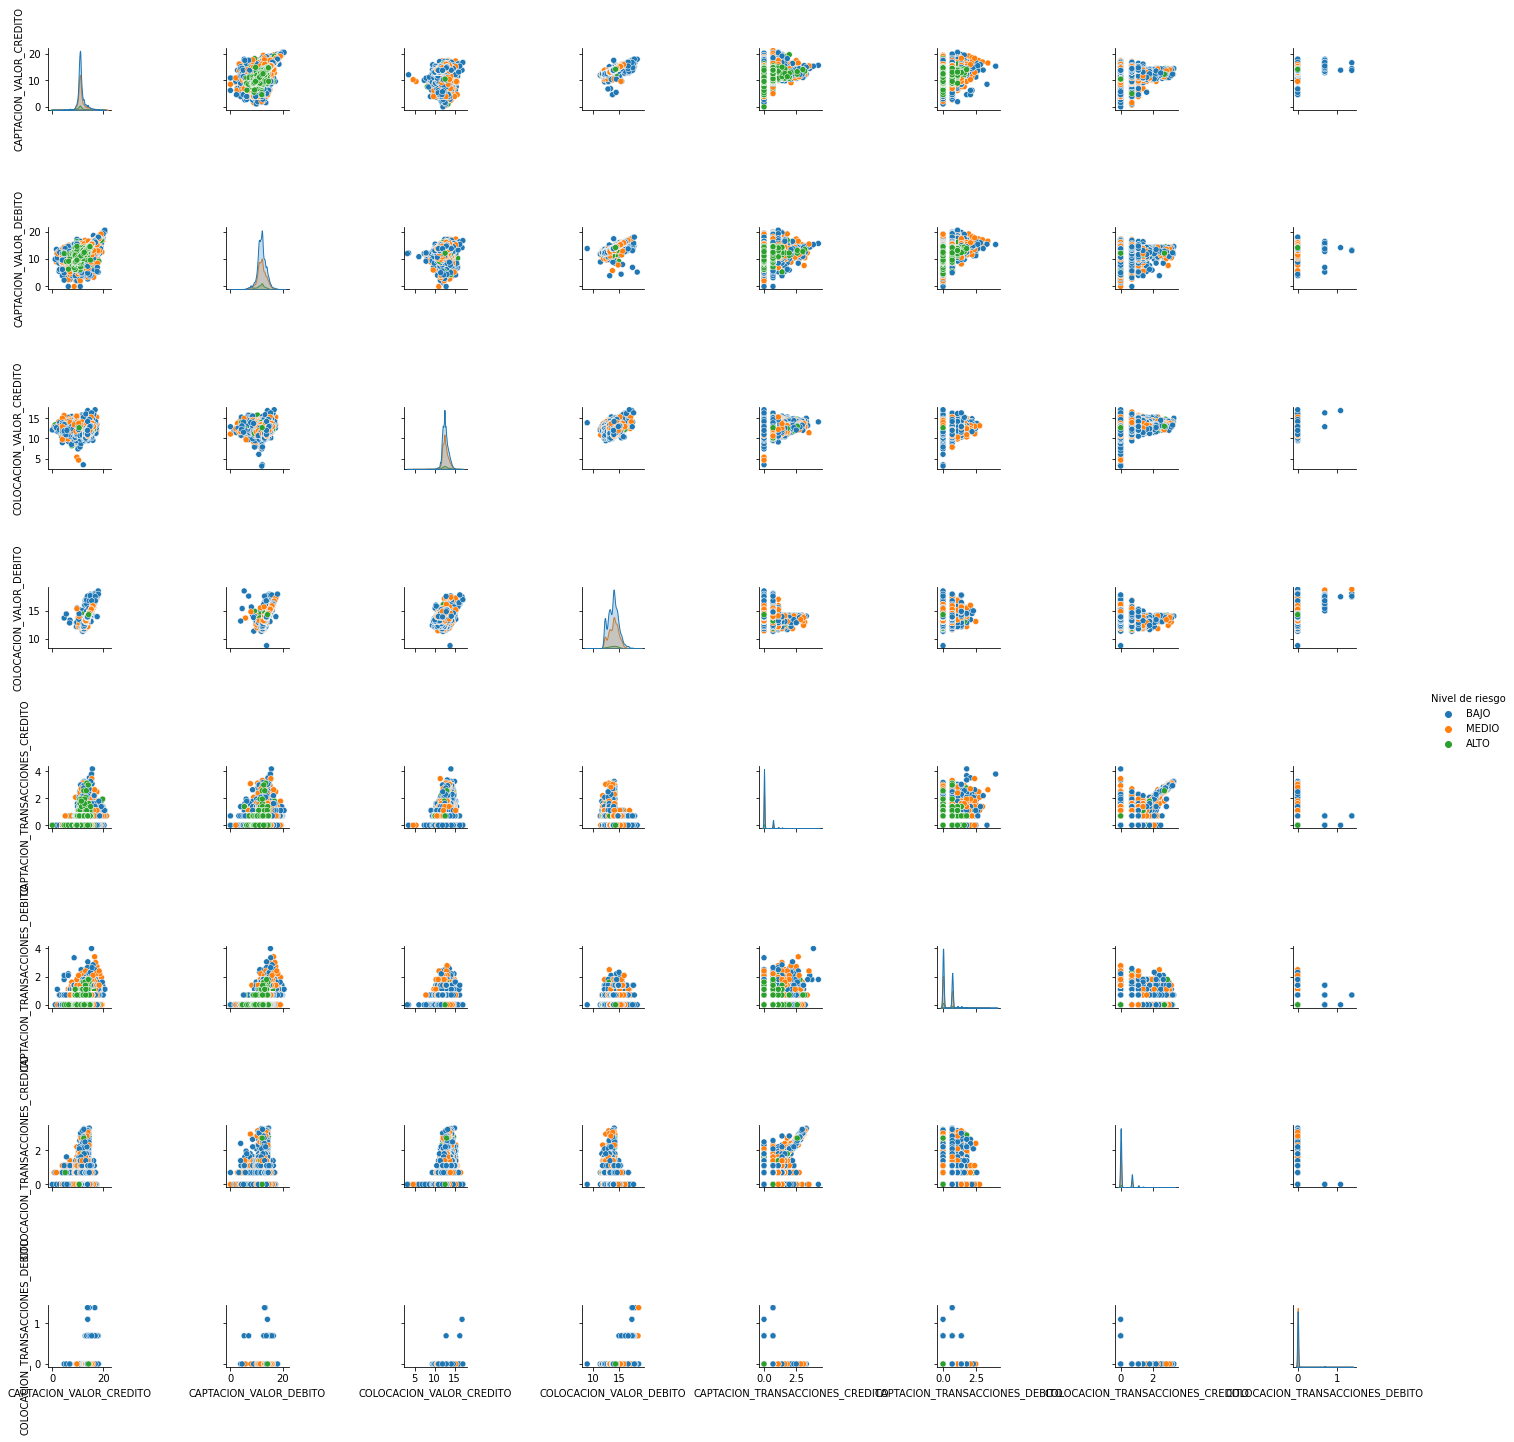

In [44]:
temp = data_num3[['CAPTACION_VALOR_CREDITO', 'CAPTACION_VALOR_DEBITO', 'COLOCACION_VALOR_CREDITO', 'COLOCACION_VALOR_DEBITO', 'Nivel de riesgo', 'CAPTACION_TRANSACCIONES_CREDITO', 'CAPTACION_TRANSACCIONES_DEBITO', 'COLOCACION_TRANSACCIONES_CREDITO', 'COLOCACION_TRANSACCIONES_DEBITO']]
sns.pairplot(temp, hue='Nivel de riesgo')

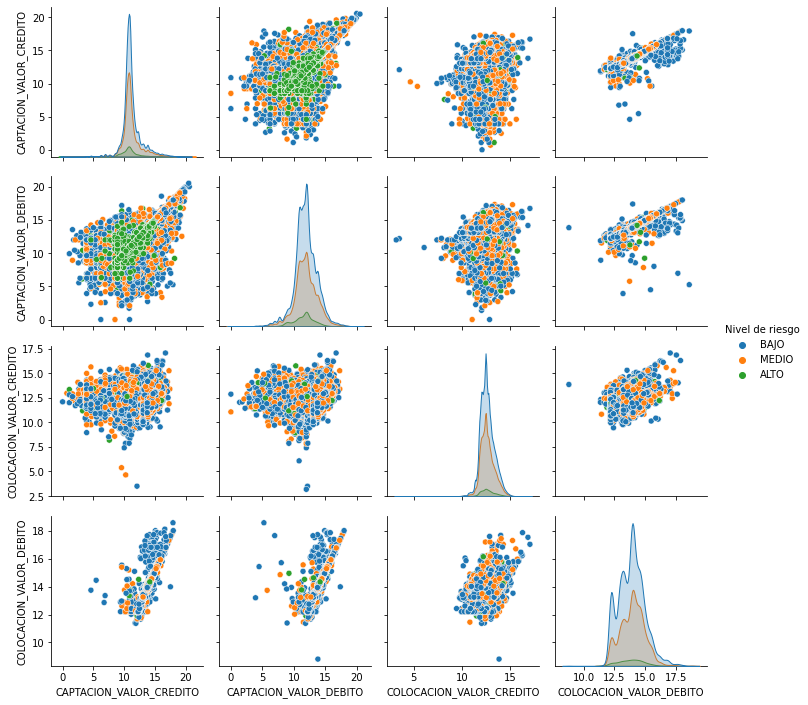

In [45]:
temp = data_num3[['CAPTACION_VALOR_CREDITO', 'CAPTACION_VALOR_DEBITO', 'COLOCACION_VALOR_CREDITO', 'COLOCACION_VALOR_DEBITO', 'Nivel de riesgo']]
sns.pairplot(temp, hue='Nivel de riesgo')

---
- Existe un relación directa entre la captación valor debito frente a la captación del valor credito. Mayoritariamente entre las personas con nivel de riesgo alto. Posiblemente sea  por los productos como cuentas corrientes de nomina o cuentas de ahorro, posiblemente se adquiera por confianza cdt o seguros. Las personas con riesgo bajo y alto suelen tener valores altos.

- Se relaciona la captación y colocación del debito. A mayor captación mayor colocaión. Cituación no se presenta en riesgo alto.
---

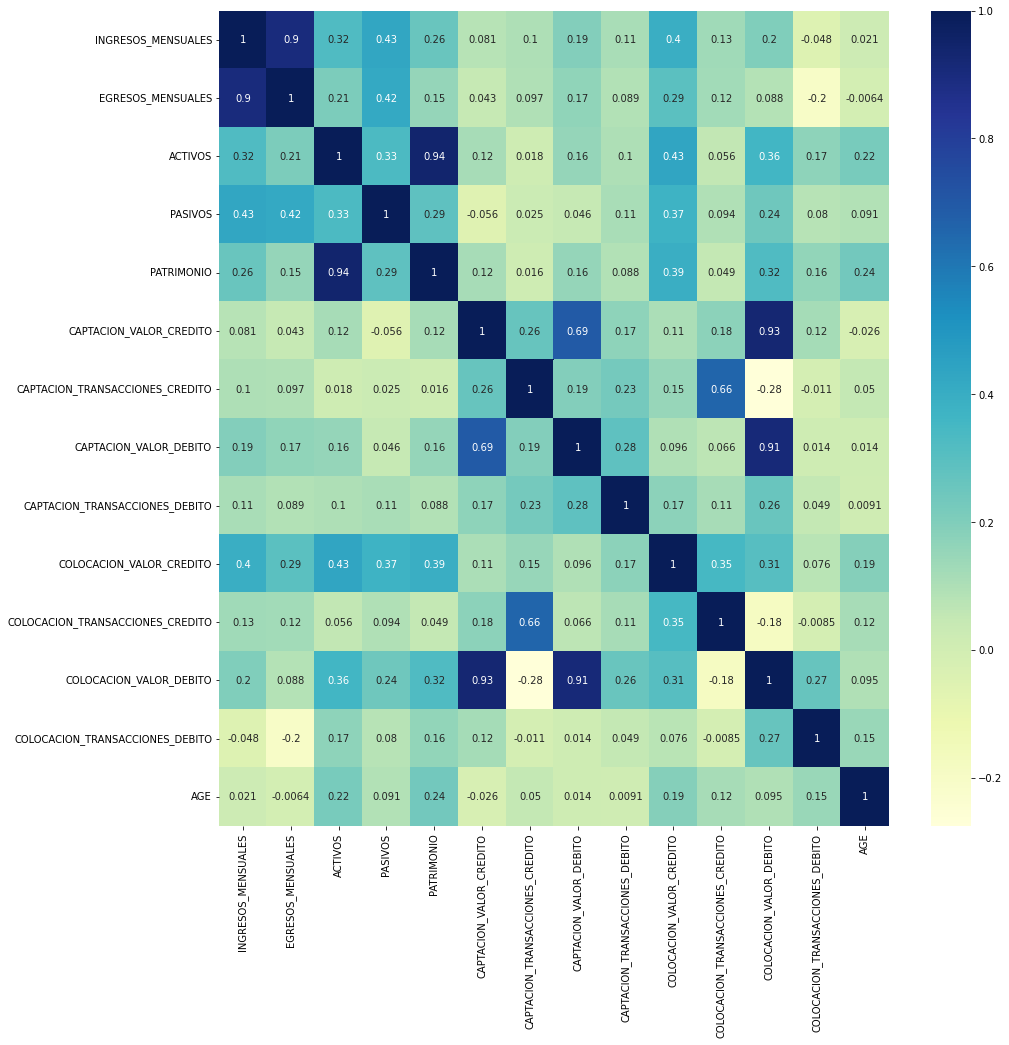

In [39]:
plt.figure(figsize=(15,15))
sns.heatmap(data_num3.corr(), annot=True, cmap="YlGnBu")

# **Número óptimo de segmentos**
---

In [54]:
data_clustering = data[data_numeric+['Age']]

In [41]:
scaler = StandardScaler()
data_clustering_scaler = scaler.fit_transform(data_clustering)

In [42]:
data_clustering_scaler = pd.DataFrame(data_clustering_scaler, columns = data_numeric)
data_clustering_scaler.head(3)

,INGRESOS_MENSUALES,EGRESOS_MENSUALES,ACTIVOS,PASIVOS,PATRIMONIO,CAPTACION_VALOR_CREDITO,CAPTACION_TRANSACCIONES_CREDITO,CAPTACION_VALOR_DEBITO,CAPTACION_TRANSACCIONES_DEBITO,COLOCACION_VALOR_CREDITO,COLOCACION_TRANSACCIONES_CREDITO,COLOCACION_VALOR_DEBITO,COLOCACION_TRANSACCIONES_DEBITO
0,-0.005312,-0.005103,-0.017663,-0.013602,-0.012955,-0.078423,0.056084,-0.065346,-0.506956,-0.819645,-1.201755,-0.075063,-0.194876
1,-0.005413,-0.005103,-0.021072,-0.013805,-0.016193,-0.078423,0.056084,-0.065346,-0.506956,-0.819645,-1.201755,-0.075063,-0.194876
2,-0.005274,-0.004932,-0.017663,-0.007104,-0.014935,-0.077798,0.056084,-0.065346,-0.506956,-0.819645,-1.201755,-0.075063,-0.194876


In [44]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [45]:
scaler = MinMaxScaler()
data_clustering_min = scaler.fit_transform(data_clustering)

In [46]:
data_clustering_min = pd.DataFrame(data_clustering_min, columns = data_numeric)
data_clustering_min.head(3)

,INGRESOS_MENSUALES,EGRESOS_MENSUALES,ACTIVOS,PASIVOS,PATRIMONIO,CAPTACION_VALOR_CREDITO,CAPTACION_TRANSACCIONES_CREDITO,CAPTACION_VALOR_DEBITO,CAPTACION_TRANSACCIONES_DEBITO,COLOCACION_VALOR_CREDITO,COLOCACION_TRANSACCIONES_CREDITO,COLOCACION_VALOR_DEBITO,COLOCACION_TRANSACCIONES_DEBITO
0,1.080907e-06,2.499992e-07,0.000020,6.666667e-07,0.374965,0.000009,0.015152,0.0,0.0,0.0,0.0,0.0,0.0
1,7.566346e-07,2.499992e-07,0.000004,1.666667e-07,0.374955,0.000009,0.015152,0.0,0.0,0.0,0.0,0.0,0.0
2,1.201968e-06,7.499977e-07,0.000020,1.666667e-05,0.374959,0.000013,0.015152,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
scaler_r = RobustScaler()
data_clustering_r = scaler_r.fit_transform(data_clustering)

In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

### Metoddo del codo
---

In [61]:
r_clus = range(1, 15)

def codo(data):
  nuc = []
  for i in r_clus:
    kmean = KMeans(n_clusters=i, random_state=1234)
    kmean.fit(data)
    nuc.append(kmean.inertia_)
  return nuc

In [62]:
nuc_maxmin = codo(data_clustering_min)

In [63]:
nuc_scale = codo(data_clustering_scaler)

In [74]:
nuc_scale_r = codo(data_clustering_r)

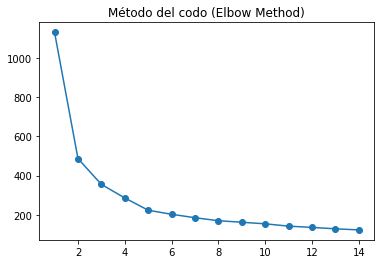

In [64]:
plt.plot(r_clus, nuc_maxmin, marker='o')
plt.title('Método del codo (Elbow Method)')
plt.show()

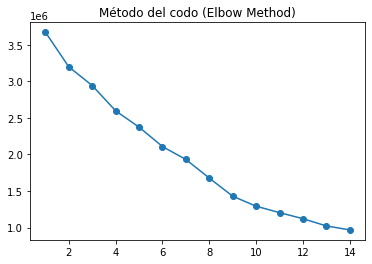

In [65]:
plt.plot(r_clus, nuc_scale, marker='o')
plt.title('Método del codo (Elbow Method)')
plt.show()

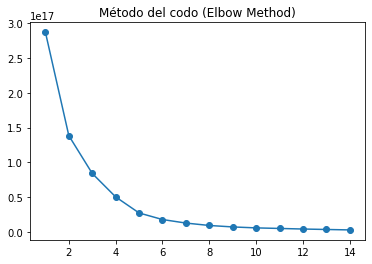

In [75]:
plt.plot(r_clus, nuc_scale_r, marker='o')
plt.title('Método del codo (Elbow Method)')
plt.show()

In [82]:
kmean_scale = KMeans(n_clusters=9, random_state=123)
kmean_scale.fit(data_clustering_scaler)
y_predict_scale = kmean_scale.predict(data_clustering_scaler)

In [83]:
kmean_min = KMeans(n_clusters=3, random_state=123)
kmean_min.fit(data_clustering_min)
y_predict_min = kmean_min.predict(data_clustering_min)

In [84]:
kmean_r = KMeans(n_clusters=4, random_state=123)
kmean_r.fit(data_clustering_r)
y_predict_robust = kmean_r.predict(data_clustering_r)

In [85]:
 y_predict_kl_sca = calinski_harabasz_score (data_clustering_scaler, y_predict_scale) 

In [86]:
 y_predict_kl_min = calinski_harabasz_score (data_clustering_min, y_predict_min) 

In [87]:
 y_predict_kl_rob = calinski_harabasz_score (data_clustering_r, y_predict_robust) 

In [92]:
y_predict_kl_sca, y_predict_kl_min, y_predict_kl_rob

(54416.9423471701, 308736.99497253273, 441079.11783144093)

Un CH alto significa una mejor agrupación ya que las observaciones en cada grupo están más juntas (más densas), mientras que los grupos en sí están más alejados entre sí (bien separados). Se selecciona el conjunto robusto

In [102]:
temp = data_numeric+['Edad']
temp

['INGRESOS_MENSUALES',
 'EGRESOS_MENSUALES',
 'ACTIVOS',
 'PASIVOS',
 'PATRIMONIO',
 'CAPTACION_VALOR_CREDITO',
 'CAPTACION_TRANSACCIONES_CREDITO',
 'CAPTACION_VALOR_DEBITO',
 'CAPTACION_TRANSACCIONES_DEBITO',
 'COLOCACION_VALOR_CREDITO',
 'COLOCACION_TRANSACCIONES_CREDITO',
 'COLOCACION_VALOR_DEBITO',
 'COLOCACION_TRANSACCIONES_DEBITO',
 'Edad']

In [93]:
import math

In [103]:
data_clustering_r = pd.DataFrame(data_clustering_r, columns =temp)
data_clustering_r.head(3)

,INGRESOS_MENSUALES,EGRESOS_MENSUALES,ACTIVOS,PASIVOS,PATRIMONIO,CAPTACION_VALOR_CREDITO,CAPTACION_TRANSACCIONES_CREDITO,CAPTACION_VALOR_DEBITO,CAPTACION_TRANSACCIONES_DEBITO,COLOCACION_VALOR_CREDITO,COLOCACION_TRANSACCIONES_CREDITO,COLOCACION_VALOR_DEBITO,COLOCACION_TRANSACCIONES_DEBITO,Edad
0,-0.441176,-0.561772,0.000000,-0.239855,0.112500,-0.410793,0.0,0.0,0.0,-0.877048,-1.0,0.0,0.0,0.478261
1,-0.551471,-0.561772,-0.221607,-0.261594,-0.163908,-0.410793,0.0,0.0,0.0,-0.877048,-1.0,0.0,0.0,0.434783
2,-0.400000,-0.386081,0.000000,0.455797,-0.056514,-0.333059,0.0,0.0,0.0,-0.877048,-1.0,0.0,0.0,-0.130435


In [109]:
data_clustering_r['Predict'] = y_predict_robust

In [110]:
counter=Counter(y_predict_robust)
print(counter)

Counter({0: 280919, 2: 1408, 1: 54, 3: 4})


In [119]:
def plot_clusters(data):
  fig = plt.figure(figsize=(15,30))
  i=1
  for var in data_numeric:
      ax = fig.add_subplot(math.ceil(len(data_numeric)/2), 2, i)
      sns.kdeplot(np.log(data).loc[data.Predict==0][var], shade=False, color='r', ax=ax, legend='0');
      sns.kdeplot(np.log(data).loc[data.Predict==1][var], shade=False, color='g', ax=ax,  legend='1');
      sns.kdeplot(np.log(data).loc[data.Predict==2][var], shade=False, color='b', ax=ax,  legend='2');
      sns.kdeplot(np.log(data).loc[data.Predict==3][var], shade=False, color='black', ax=ax,  legend='3');
      

      plt.title(var)
      plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
      i+=1
  fig.tight_layout()
  plt.subplots_adjust(top = 0.85)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density e

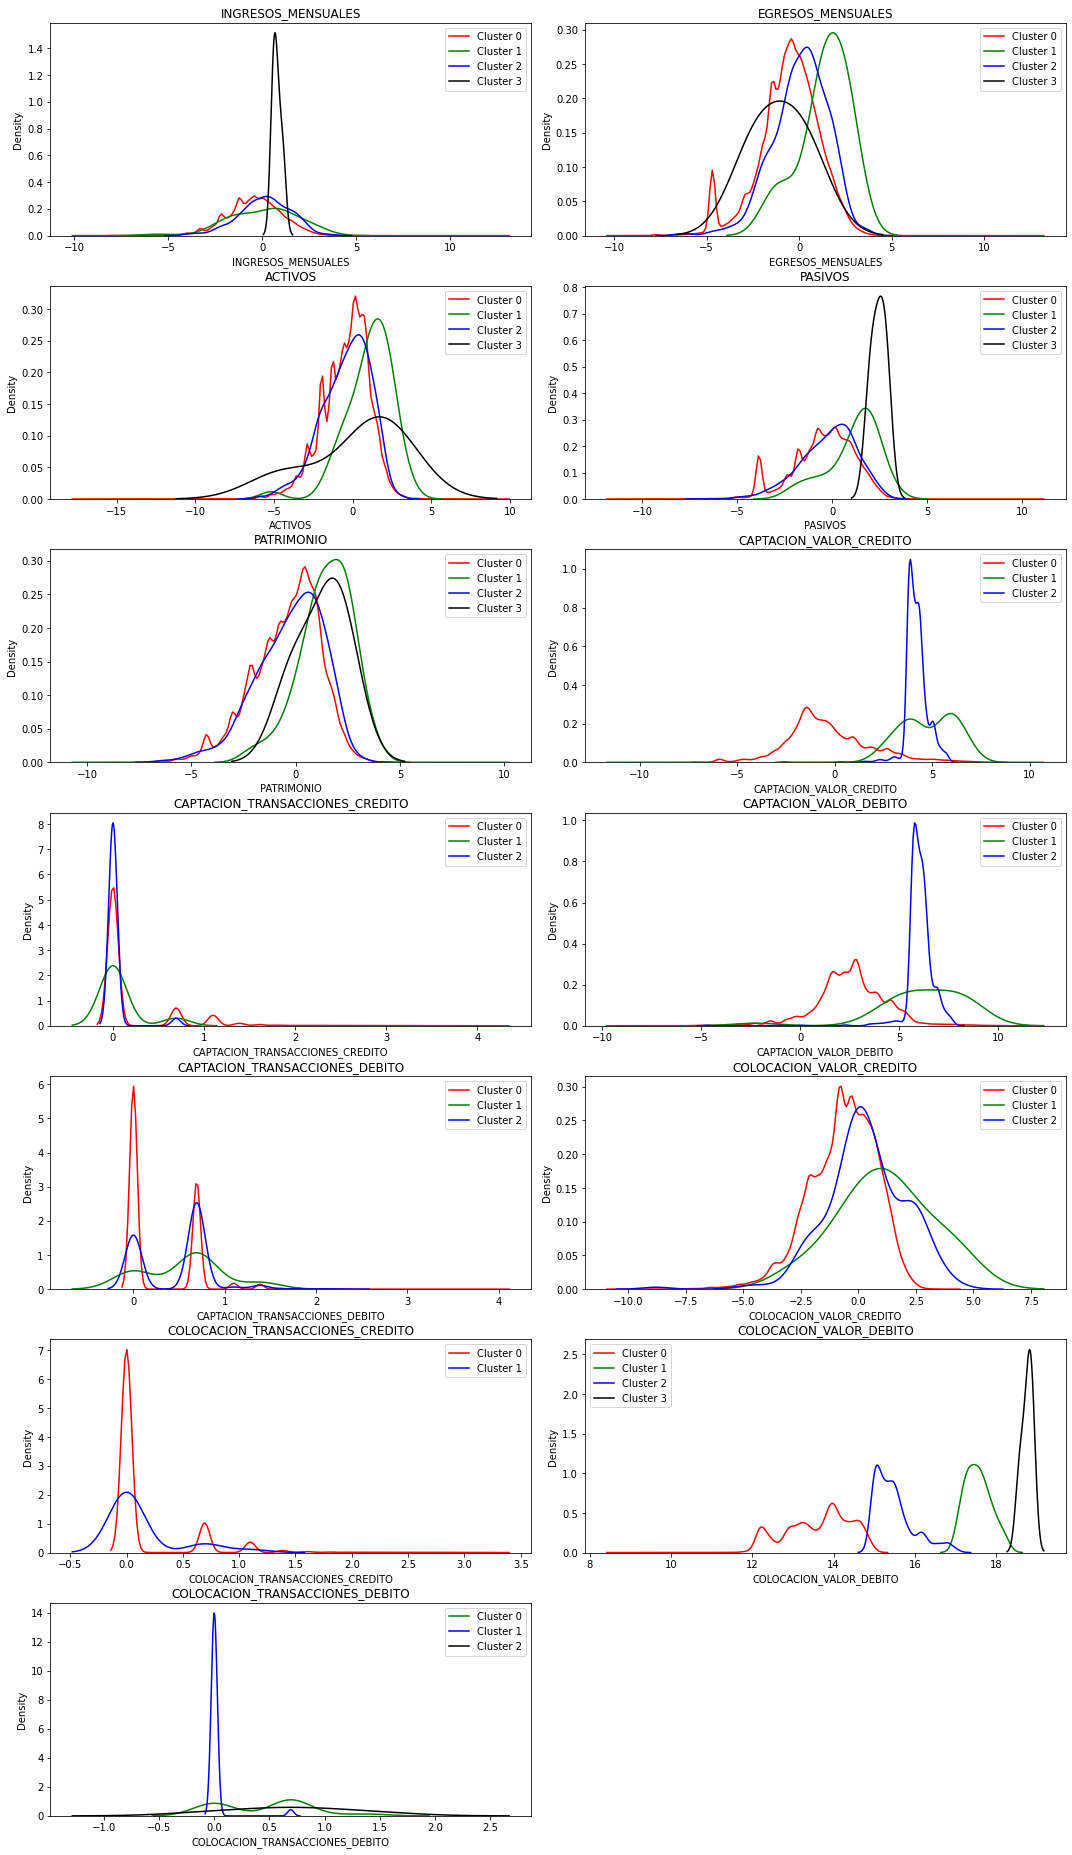

In [121]:
plot_clusters(data_clustering_r)

In [126]:
data_clustering_r_log = np.log(data_clustering_r[data_numeric])

In [127]:
data_clustering_r_log['Predict'] = y_predict_robust

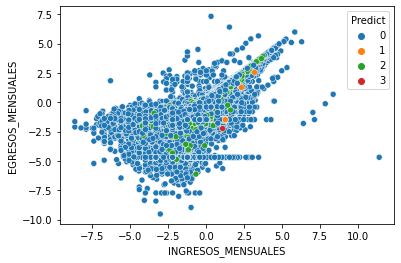

In [128]:
sns.scatterplot(x = "INGRESOS_MENSUALES", y = "EGRESOS_MENSUALES", data = data_clustering_r_log, hue='Predict',  palette="tab10")

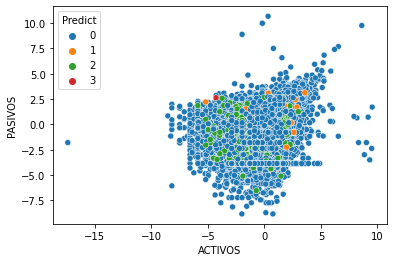

In [133]:
sns.scatterplot(x = "ACTIVOS", y = "PASIVOS", data = data_clustering_r_log, hue='Predict',  palette="tab10")

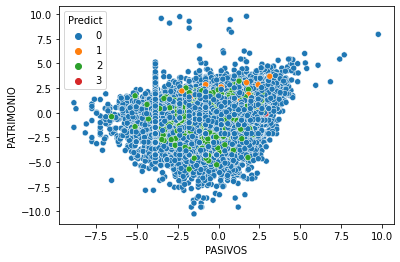

In [134]:
sns.scatterplot(x = "PASIVOS", y = "PATRIMONIO", data = data_clustering_r_log, hue='Predict',  palette="tab10")

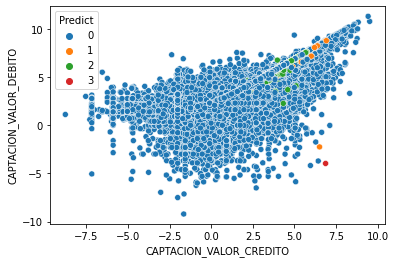

In [157]:
sns.scatterplot(x = "CAPTACION_VALOR_CREDITO", y = "CAPTACION_VALOR_DEBITO", data = data_clustering_r_log, hue='Predict',  palette="tab10")

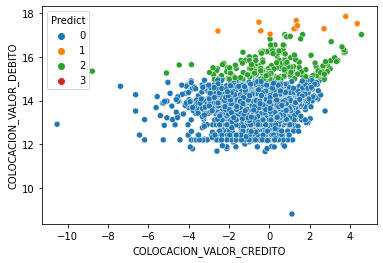

In [160]:
sns.scatterplot(x = "COLOCACION_VALOR_CREDITO", y = "COLOCACION_VALOR_DEBITO", data = data_clustering_r_log, hue='Predict',  palette="tab10")

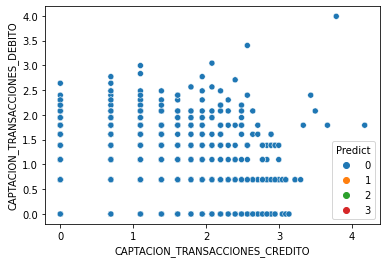

In [161]:
sns.scatterplot(x = "CAPTACION_TRANSACCIONES_CREDITO", y = "CAPTACION_TRANSACCIONES_DEBITO", data = data_clustering_r_log, hue='Predict',  palette="tab10")

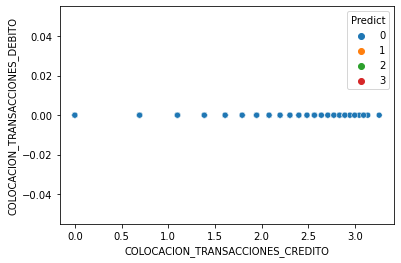

In [162]:
sns.scatterplot(x = "COLOCACION_TRANSACCIONES_CREDITO", y = "COLOCACION_TRANSACCIONES_DEBITO", data = data_clustering_r_log, hue='Predict',  palette="tab10")

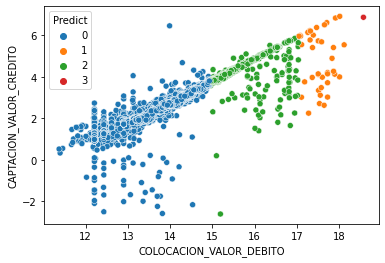

In [163]:
sns.scatterplot(x = "COLOCACION_VALOR_DEBITO", y = "CAPTACION_VALOR_CREDITO", data = data_clustering_r_log, hue='Predict',  palette="tab10")

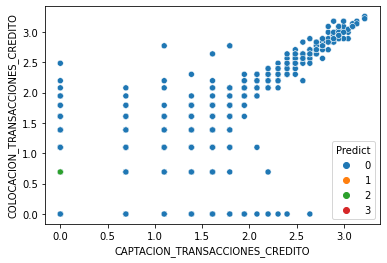

In [164]:
sns.scatterplot(x = "CAPTACION_TRANSACCIONES_CREDITO", y = "COLOCACION_TRANSACCIONES_CREDITO", data = data_clustering_r_log, hue='Predict',  palette="tab10")

# **silhouette**
---